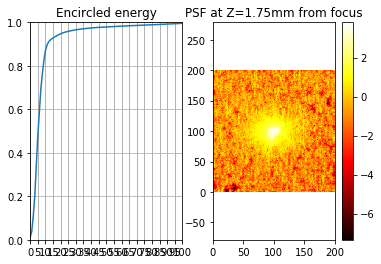

In [4]:
import numpy as np
#import matplotlib.cm as cm
#import matplotlib.colors as col
#import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
#import colormap as cmaps
#from matplotlib.ticker import MultipleLocator, FormatStrFormatter

PSF=np.loadtxt("E:\PSF_analysis\PSF_175_May_2017\PSF_Z175.txt")

PSFlog=np.log10(PSF)

f, (ax1, ax2) = plt.subplots(1, 2)


ax2.axis([0, 200, 0, 200])

major_ticks = np.arange(0, 200, 1)                                              
minor_ticks = np.arange(0, 200, 1) 

ax2.axis('equal')
ax2.set_title('PSF at Z=1.75mm from focus')

pc=ax2.pcolor(PSFlog, cmap='hot')

plt.colorbar(pc, cmap='hot')


#find the centroid of the image
xx = np.arange(PSF.shape[1])
yy = np.arange(PSF.shape[0])
x,y =np.meshgrid(xx,yy)
x0 = (x*PSF).sum()/PSF.sum()
y0 = (y*PSF).sum()/PSF.sum()
center=np.array([x0,y0])


#plt.hist(PSF.ravel(), 

# fin EE
y, x = np.indices(PSF.shape)
r = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2) # radius in bin size steps
ind = np.argsort(r.flat) #order the index of the matrix r
sr = r.flat[ind] #ordina il vettore r in ordine crescente    
sim = PSF.flat[ind] #ordina límmagine
ri = sr.astype(int) #vetore r ordered and made int    
deltar = ri[1:] - ri[:-1]  # assume all radii represented (more work if not)    
rind = np.where(deltar)[0]
nr = rind[1:] - rind[:-1]  # number of radial bins    
csim = np.cumsum(sim, dtype=float)  # cumulative sum to figure out sums for each bin    
tbin = csim[rind[1:]] - csim[rind[:-1]]  # sum for image values in radius bins    
radialprofile = tbin / nr

EEtot = csim[rind]
EE=EEtot/PSF.sum()

# pre-pend the initial element that the above code misses.
radialprofile2 = np.empty(len(radialprofile) + 1)
if rind[0] != 0:
    radialprofile2[0] = csim[rind[0]] / (rind[0] + 1)  # if there are multiple elements in the center bin, average them
else:
    radialprofile2[0] = csim[0]  # otherwise if there's just one then just take it.
    
radialprofile2[1:] = radialprofile
rr = np.arange(len(radialprofile2))
              
l=rind.shape[0]

ax1.axis([0,100, 0, 1])
ax1.plot(rr,EE)

ax1.grid()
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.grid(True,'minor')
ax1.set_title('Encircled energy')


plt.show()

#find the 90% value
x=np.where(EE<=.9)[0]
dd=x[-1]